In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn import metrics

In [23]:
df = pd.read_csv("sequitur/seq_features3.csv")

y = df['spam']
X = df.drop(['spam'],axis=1)

In [4]:
df.head()

,num_rules,average_rule_length,average_rule_usage,stddev_rule_length,stddev_rule_usage,proportion_terminal_characters,spam
0,131,5.30534,3.89313,35.4131,1.88911,0.306499,1
1,53,6.62264,3.56604,30.0435,1.55417,0.463362,1
2,22,7.00000,3.27273,22.0454,1.28565,0.597701,1
3,329,5.23100,4.66869,55.4813,3.02366,0.159826,1
4,370,4.87568,4.33243,51.2375,2.68837,0.139031,1


In [3]:
clf = AdaBoostClassifier(ExtraTreesClassifier())
scores = cross_validation.cross_val_score(clf, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.822303 +/- 0.021358


In [7]:
et = ExtraTreesClassifier()
scores = cross_validation.cross_val_score(et, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.813790 +/- 0.025218


In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = AdaBoostClassifier(RandomForestClassifier())
scores = cross_validation.cross_val_score(rf, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.806635 +/- 0.026396


In [8]:
rf2 = RandomForestClassifier()
scores = cross_validation.cross_val_score(rf2, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.813209 +/- 0.025823


In [5]:
from sklearn.linear_model import LogisticRegression
lr = AdaBoostClassifier(LogisticRegression())
scores = cross_validation.cross_val_score(lr, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.771821 +/- 0.027939


In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
scores = cross_validation.cross_val_score(kn, X, y, cv=7)
print "Accuracy: %f +/- %f" % (np.mean(scores), np.std(scores))

Accuracy: 0.777639 +/- 0.011861


In [3]:
#FEATURE IMPORTANCES
et = ExtraTreesClassifier()
et.fit(X, y)
print et.score(X, y)
print et.feature_importances_

0.999226604795
[ 0.13267246  0.15774708  0.14067399  0.21493218  0.14084621  0.21312807]


In [28]:
#LOG REG COEFFICIENTS
lr = LogisticRegression()
lr.fit(X,y)
print lr.coef_
print X.corr()

[[-0.01561109  0.03077874 -3.31627578  0.21586861  2.19628662  1.17469831
   4.47263145 -1.47747413 -1.95981627]]
                          num_rules  average_rule_len  average_rule_usage  \
num_rules                  1.000000         -0.370391            0.785709   
average_rule_len          -0.370391          1.000000           -0.670654   
average_rule_usage         0.785709         -0.670654            1.000000   
std_rule_len               0.873806         -0.370160            0.874512   
std_rule_usage             0.928736         -0.355663            0.855360   
prop_term_char            -0.717480          0.737089           -0.865274   
prop_bigrams               0.344921         -0.619460            0.709462   
prop_repeat_rule_bigrams   0.006222         -0.169230            0.065067   
prop_repeat_bigrams       -0.047060         -0.133906            0.010321   

                          std_rule_len  std_rule_usage  prop_term_char  \
num_rules                     0.873806   

In [24]:
#CLASSIFICATION REPORT
y_train = y[0::5].append(y[1::5]).append(y[2::5]).append(y[3::5])
y_test = y[4::5]
X_train = X[0::5].append(X[1::5]).append(X[2::5]).append(X[3::5])
X_test = X[4::5]
et.fit(X_train,y_train)
print classification_report(y_test, et.predict(X_test))

             precision    recall  f1-score   support

          0       0.85      0.92      0.89       734
          1       0.76      0.61      0.68       300

avg / total       0.83      0.83      0.83      1034



In [19]:
et.fit(X_train,y_train)
ours = et.predict(X_test)

import antispam
import os

directory = 'enron1/spam/'
count = 0
bm = []
for filename in os.listdir(directory):
    if count % 5 == 4:
        with open(directory + filename, 'r') as content_file:
            content = content_file.read()
            bm.append(antispam.is_spam(content))
    count += 1

directory = 'enron1/ham/'
for filename in os.listdir(directory):
    if count % 5 == 4:
        with open(directory + filename, 'r') as content_file:
            content = content_file.read()
            bm.append(antispam.is_spam(content))
    count += 1
    
print len(ours)
print len(bm)

1034
1034


Automatically created module for IPython interactive environment


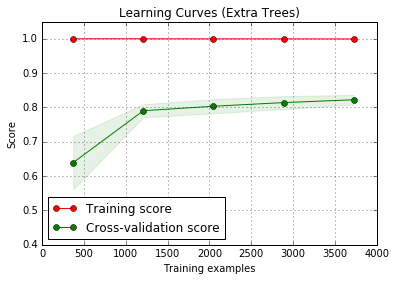

In [25]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Extra Trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = 10

estimator = ExtraTreesClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
axes = plt.gca()
axes.set_ylim([0.4,1.05])

plt.show()

In [14]:
X_train.shape

(5172, 4)